# This notebook handles the Inspection, Exploration, Manipulation, and Machine Learning Processing for a Spotify Audio Metrics Dataset

## Data Inspection

In [37]:
# Using these for the handeling and manipulation of data
import pandas as pand
import numpy as nump
import seaborn as seab
import matplotlib.pyplot as plts

song_data = pand.read_csv(r'Data/song_data.csv')
song_data

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [38]:
# Finding midpoint (Used later)
midpoint_value = song_data['song_popularity'].median()
print(midpoint_value)

56.0


Text(0.5, 1.0, 'Count of Songs: Over vs. Under 56')

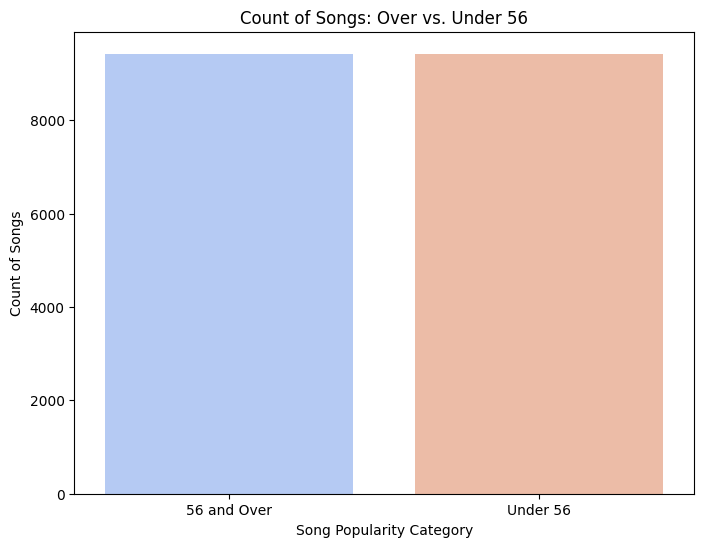

In [39]:
# The following code just plots the data where approximately half is 56 and over 
# and half in the 56 and under. This is used in making popularity binary

count_over_56 = (song_data['song_popularity'] >= 56).sum()
count_under_56 = (song_data['song_popularity'] < 56).sum()

count_data = pand.DataFrame({
    'Category': ['56 and Over', 'Under 56'],
    'Count': [count_over_56, count_under_56]
}) 

plts.figure(figsize=(8, 6))
seab.barplot(x='Category', y='Count', hue='Category', data=count_data, palette='coolwarm', legend=False)


plts.xlabel('Song Popularity Category')
plts.ylabel('Count of Songs')
plts.title('Count of Songs: Over vs. Under 56')

In [40]:
# Taking a look at the data for each entry
print(song_data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

In [41]:
# Gathering a count of unique songs (in case there are repeats)
unique_songs = song_data['song_name'].nunique()
print(unique_songs)

13070


In [42]:
# Checking for missing data values/irregularities 
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


## Data Exploration

#### After observing that the data is complete, I will now begin looking at the relationship with each variable and the depedent variable, popularity. * Note * Song name is categorical and if included in the model, it may cause more overfitting, therefore it would be better that it is removed. Let's make some graphs!!!

In [43]:
# Making column names into a list to be able to analyze each x,y relationship
column_names = song_data.columns.tolist()
column_names = column_names[2::]
print(column_names)

['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


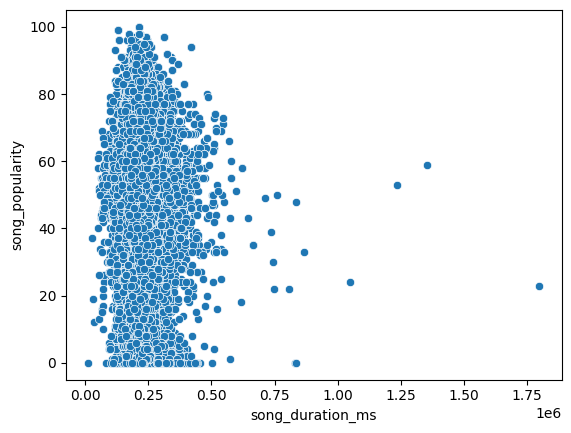

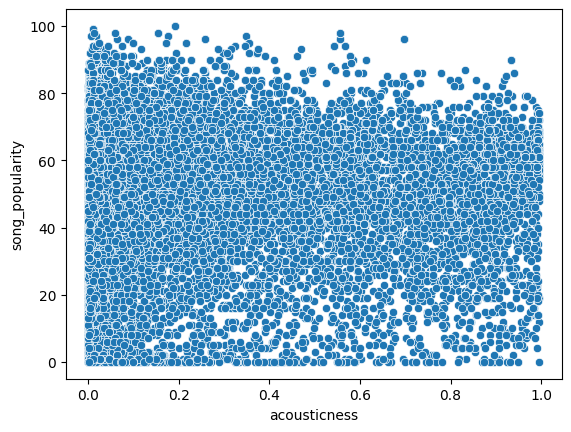

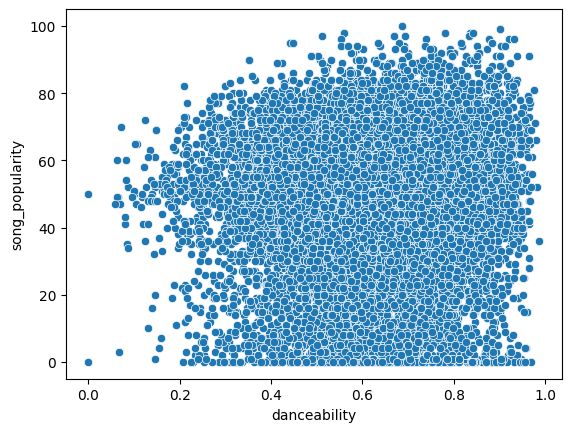

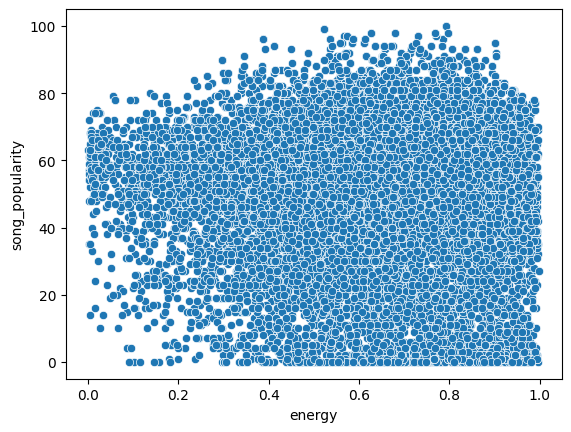

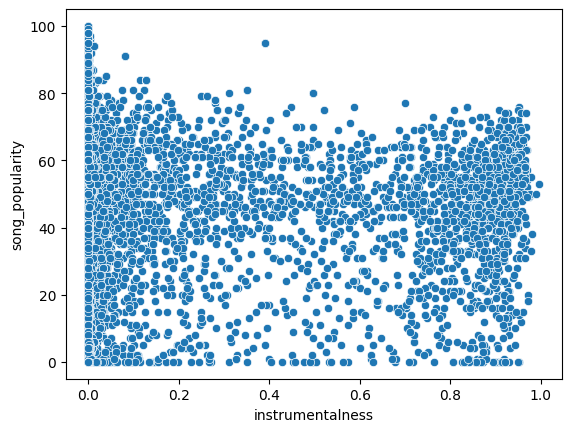

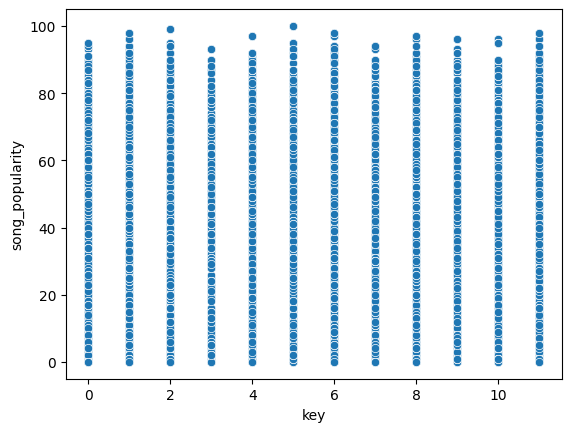

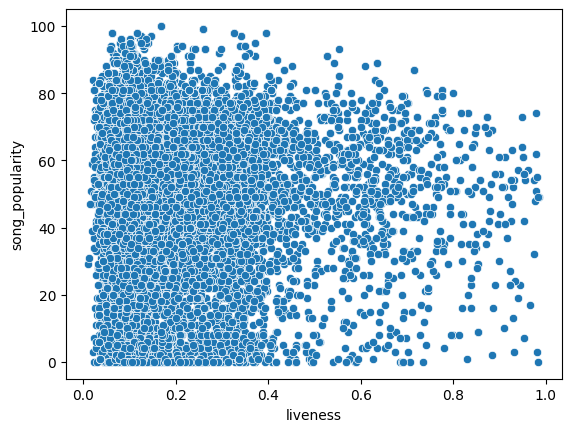

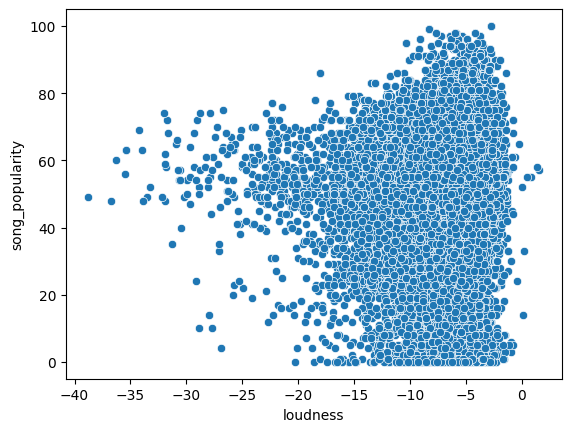

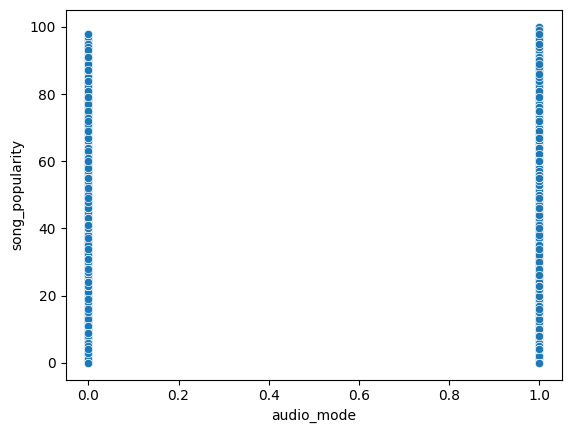

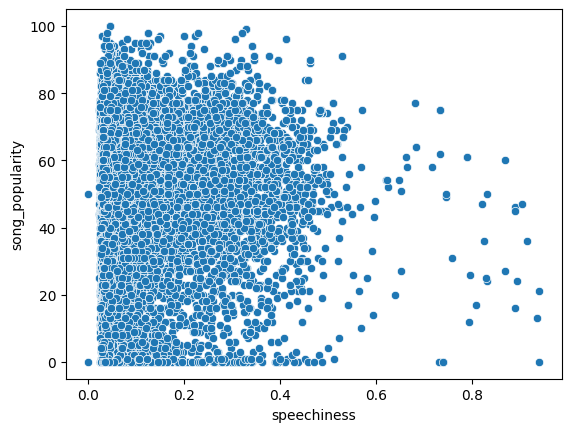

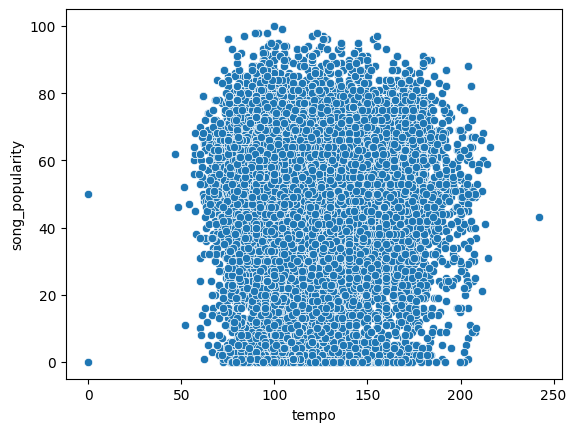

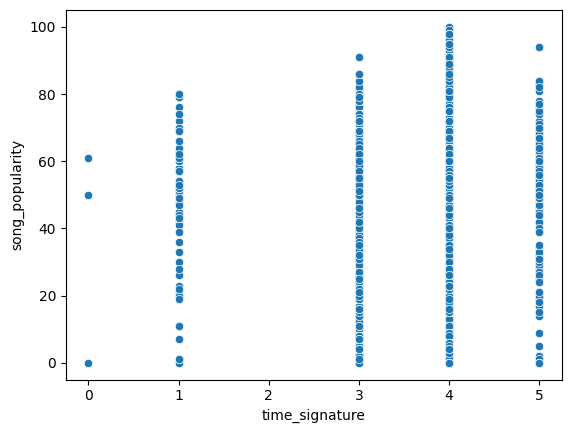

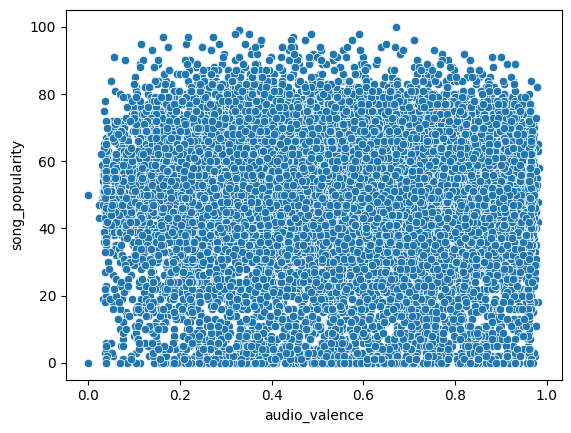

In [44]:

for value in column_names:
    seab.scatterplot(x= value, y = 'song_popularity', data=song_data)
    plts.show()


#### Interesting... Lots of data. Time to remove the song names. Then, I am going to create a pairplot to try and visually observe any multicollinearity. Slight data manipulation is done here for pairplot.

In [45]:
# Dropping song name
new_song_data = song_data.drop('song_name',axis=1)
print(new_song_data.columns)
new_song_data

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  
0      167.060               4          0.474  
1      105.256               4          0.370  
2      123.881               4          0.324  
3      122.444               4          0.198  
4      172.011               4          0.574  
...        ...             ...            ...  
18830  113.969               4          0.300  
18831   94.286               4          0.265  
18832  130.534               4          0.286  
18833  106.063               4          0.323  
18834   91.490               4          0.581  

[18835 rows x 14 columns]

In [46]:
# Establishing X and Y variables to make the pair
X = new_song_data.iloc[:,1:]
Y = new_song_data.iloc[:,0]
print(Y)
print(X)

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64
       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833  

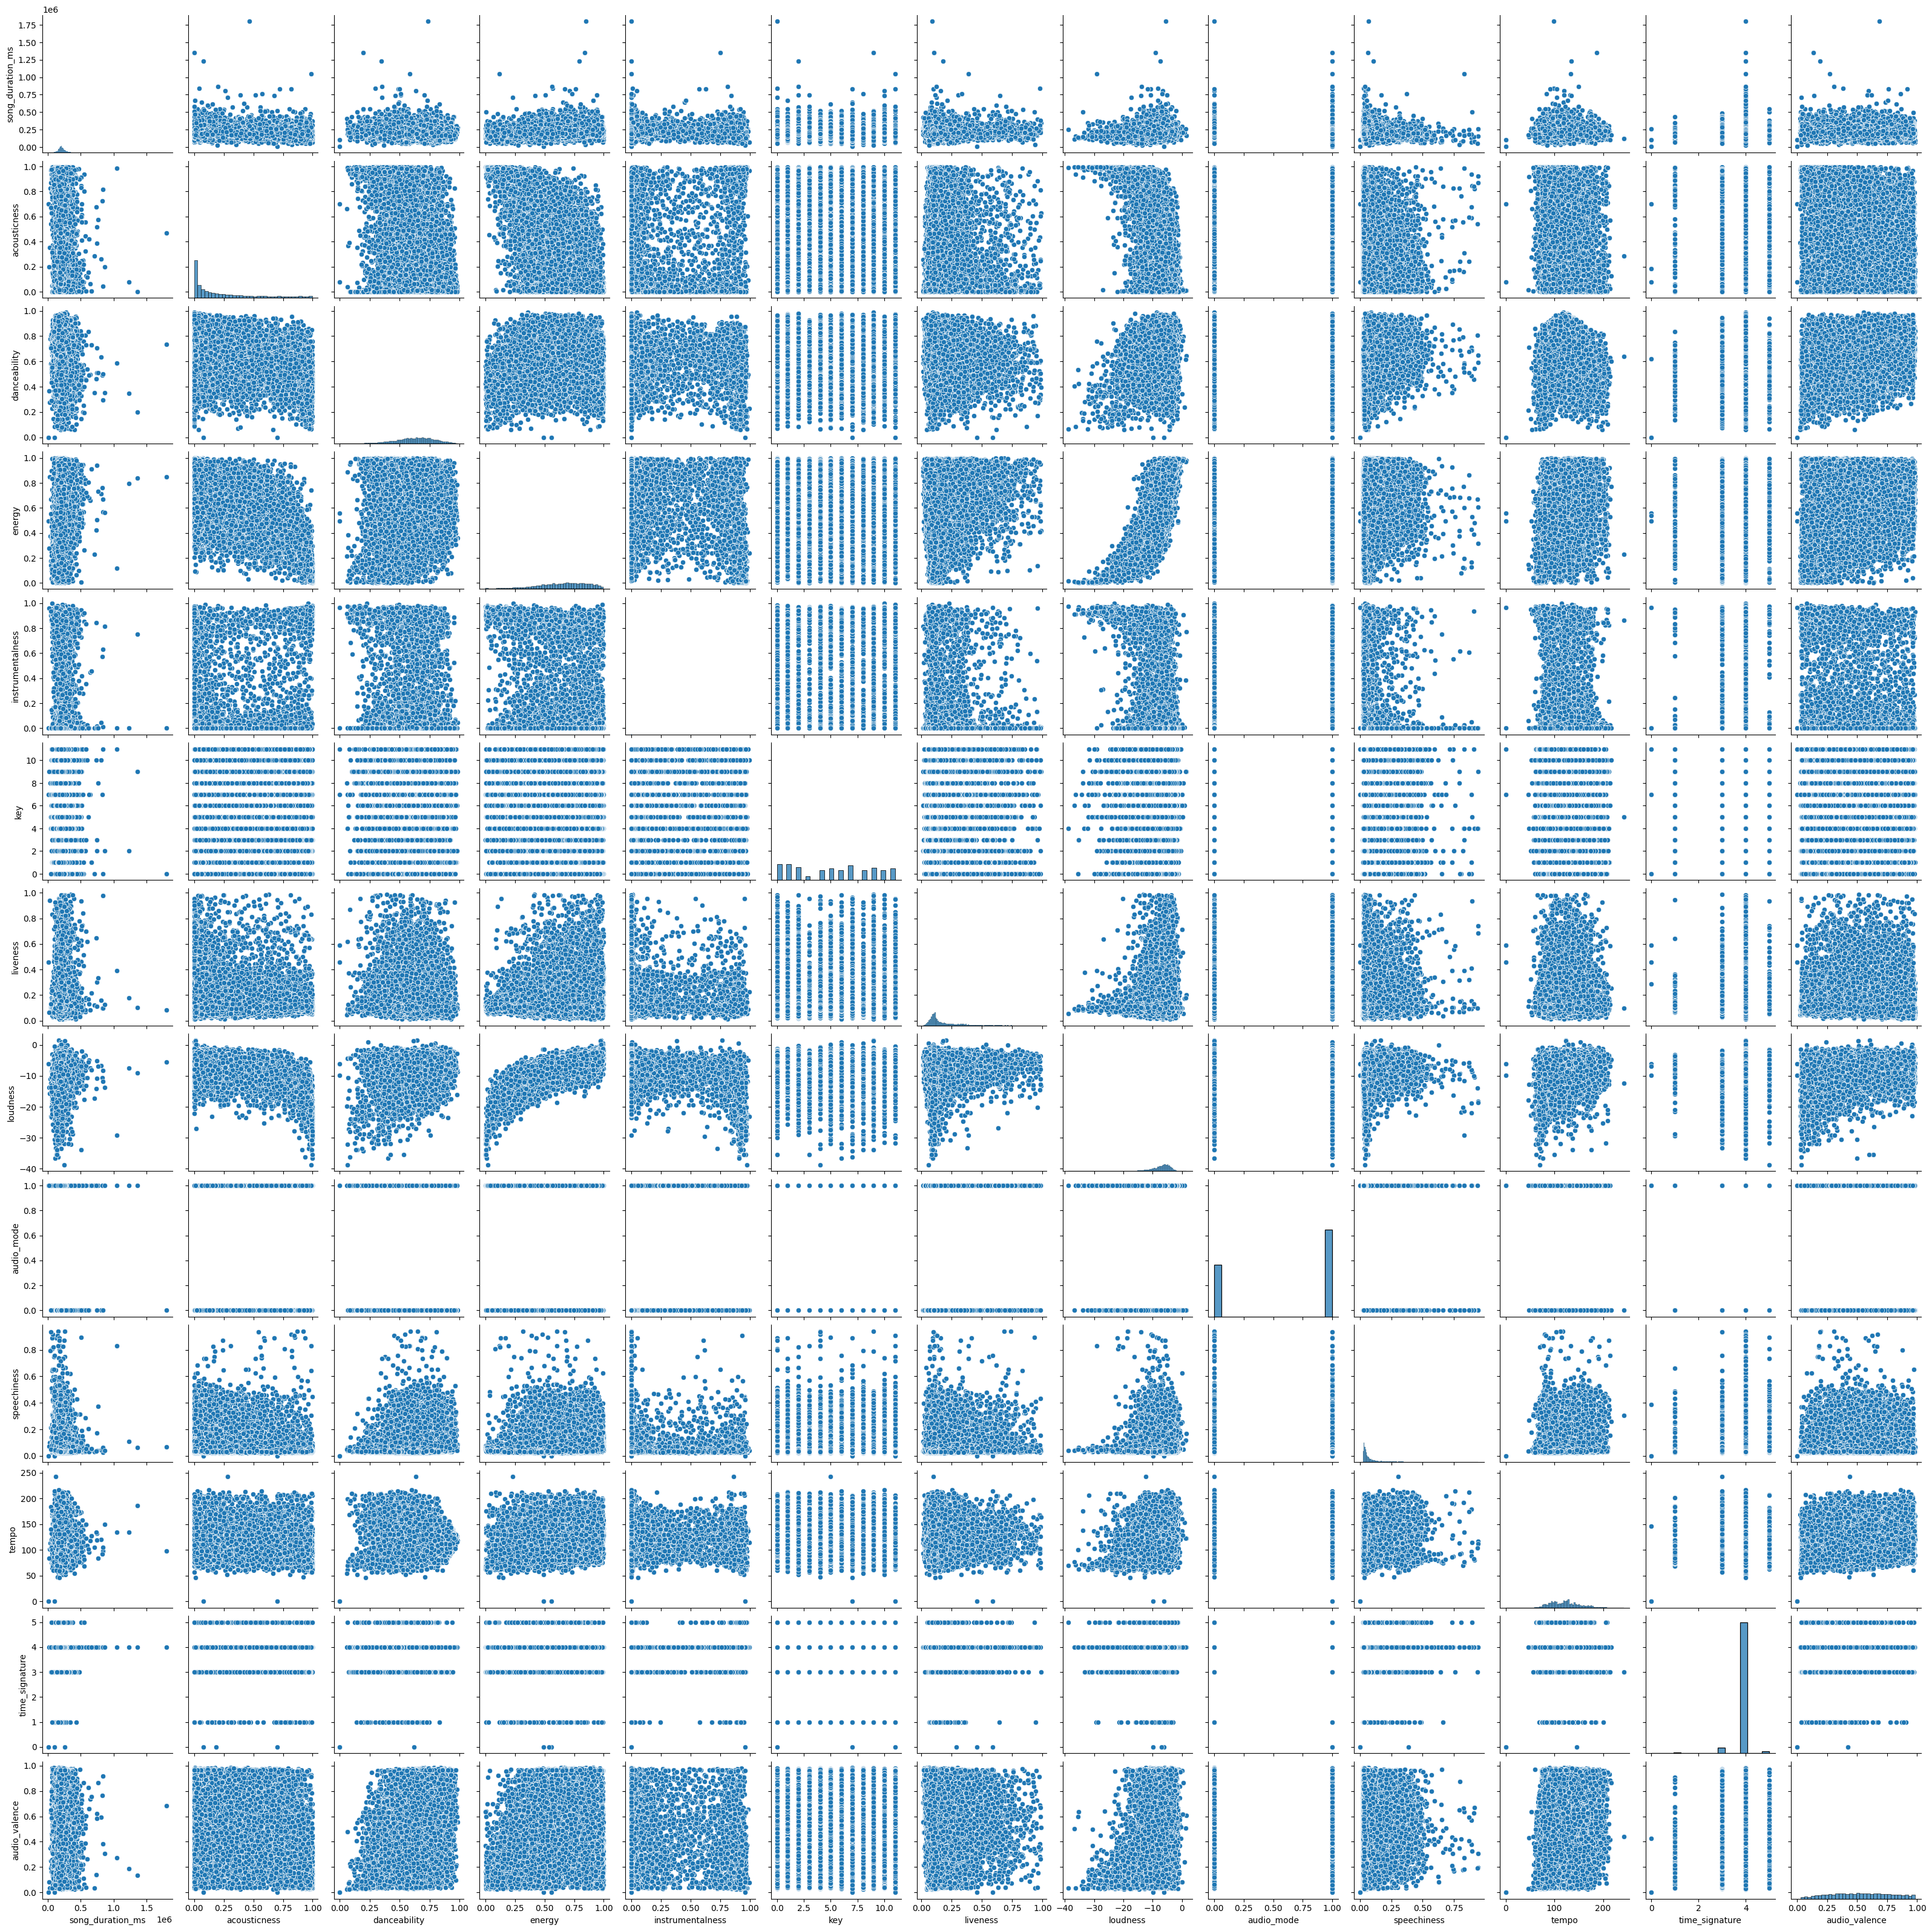

In [47]:
seab.pairplot(X)

#### I am keeping note of the relationship between energy and loudness as it seems correlated.

#### Now, lets create a correlation matrix to get a better understanding of the relationships between each variable.

<Axes: >

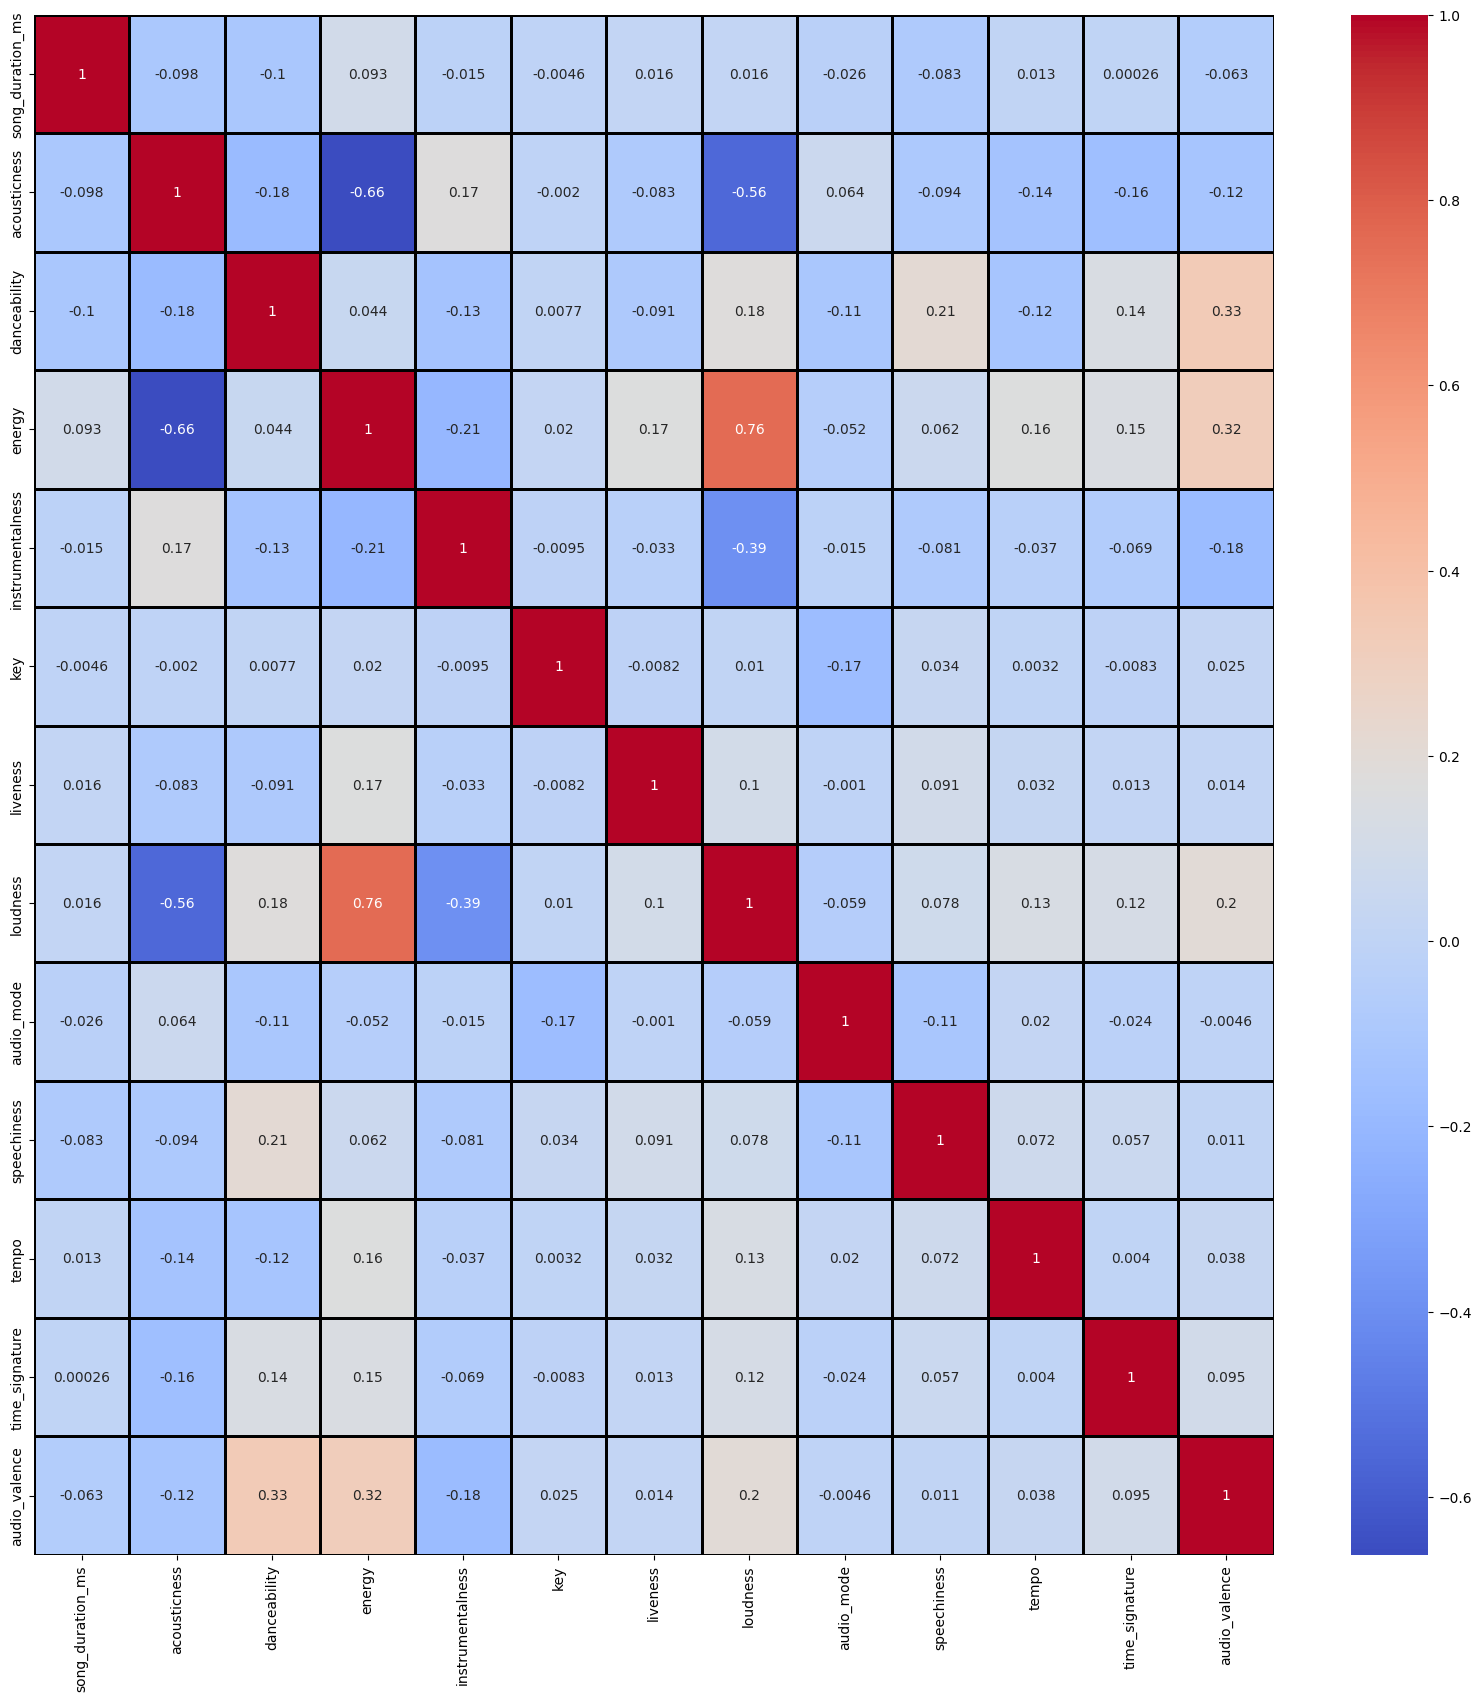

In [48]:
#creating and customizing correlation matrix
relationship_matrix = X.corr()
indices = relationship_matrix.index
plts.figure(figsize=(20,20))
seab.heatmap(relationship_matrix, annot=True, cmap="coolwarm", linewidths=1, linecolor='black')

## Data Processing

In [49]:
# Importing the libraries I use for processing my data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#### The below code makes population a binary variable (0 or 1), where zero represents exactly half of the data (the cutoff is at popularity == 56) below a certian popularity threshold. This is deemed not popular for the purposes of the model

In [50]:
# The code that alters popularity values to be either zero or one
new_song_data['song_popularity'] = pand.qcut(new_song_data['song_popularity'],q=2,labels=[1,0])

#### Earlier, X and Y were assigned for the dataframe to make the correlation matrix among other graphs. Now we want the binary representation of popularity in our updated X and Y to be able to run the models.

In [51]:
X = new_song_data.iloc[:,1:]
Y = new_song_data.iloc[:,0]
print(Y)
print(X)

0        0
1        0
2        0
3        0
4        1
        ..
18830    0
18831    0
18832    1
18833    1
18834    0
Name: song_popularity, Length: 18835, dtype: category
Categories (2, int64): [1 < 0]
       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325      

In [52]:
# Scaling each column to be centered with a mean of 0 and a variance of 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
# Splitting the training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=8)

## Model Testing

#### After numerous tests, I decided to run all the below models.

In [54]:
LOG_model = LogisticRegression()
KNC_model = KNeighborsClassifier()
DCT_model = DecisionTreeClassifier()
MLP_model = MLPClassifier()
SVC_model = SVC()
RDF_model = RandomForestClassifier(n_estimators=100, random_state=42)
GBC_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

The MLP model has a convergence warning, but does not arrive at the best percentage accuracy either way so I filtered the warning.

In [55]:
from sklearn.exceptions import ConvergenceWarning
import warnings

LOG_model.fit(X_train, Y_train)
KNC_model.fit(X_train, Y_train)
DCT_model.fit(X_train, Y_train)

# Suppress warning for MLP_model only
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    MLP_model.fit(X_train, Y_train)

SVC_model.fit(X_train, Y_train)
RDF_model.fit(X_train, Y_train)
GBC_model.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

In [56]:
LOG_acc = LOG_model.score(X_test, Y_test)
KNC_acc = KNC_model.score(X_test, Y_test)
DCT_acc = DCT_model.score(X_test, Y_test)
MLP_acc = MLP_model.score(X_test, Y_test)
SVC_acc = SVC_model.score(X_test, Y_test)
RDF_acc = RDF_model.score(X_test, Y_test)
GBC_acc = GBC_model.score(X_test, Y_test)

In [57]:
print('LOG_model:', LOG_acc)
print('KNC_model:', KNC_acc)
print('DCT_model:', DCT_acc)
print('MLP_model:', MLP_acc)
print('SVC_model:', SVC_acc)
print('RDF_model:', RDF_acc)
print('GBC_model:', GBC_acc)

LOG_model: 0.5975791038437035
KNC_model: 0.628158844765343
DCT_model: 0.6884688893607984
MLP_model: 0.6203015502229773
SVC_model: 0.6126566149925674
RDF_model: 0.7339137821193459
GBC_model: 0.6319813123805479


## Model Optimization

### Extra Trees Classifier Model

#### Since the Random Tree performed well, I decided to include the Extra Trees Classifier to see if the additional randomness would provide an improvement in model performance.

In [58]:
ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
ETC_model.fit(X_train, Y_train)
ETC_acc = ETC_model.score(X_test, Y_test)
print('ETC_model:', ETC_acc)

ETC_model: 0.7377362497345509


### Success! The Extra Trees Classifier is the best-performing model so far, with an accuracy approximately 35% higher than than that of other public models available online.

### Aiming to Tune Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [29]:
ADTC_acc = SVC_model.score(X_test, Y_test)
print('KNC_model:', ADTC_acc)

KNC_model: 0.6126566149925674


Decision Tree did not improve through tuning.

### Adding Isolation Forest for Outlier Control

In [30]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)  
y_pred = iso.fit_predict(new_song_data)  # -1 for outliers, 1 for inliers

# Filter out outliers 
cleaned_song_data = new_song_data[y_pred == 1]

# The new dataset without outliers is stored in cleaned_song_data
print(f"Original dataset shape: {song_data.shape}")
print(f"Cleaned dataset shape: {cleaned_song_data.shape}")


Original dataset shape: (18835, 15)
Cleaned dataset shape: (17893, 14)


In [31]:
X = cleaned_song_data.iloc[:,1:]
Y = cleaned_song_data.iloc[:,0]
print(Y)
print(X)

0        0
1        0
2        0
3        0
4        1
        ..
18830    0
18831    0
18832    1
18833    1
18834    0
Name: song_popularity, Length: 17893, dtype: category
Categories (2, int64): [1 < 0]
       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325      

In [32]:
# Scaling each column to be centered with a mean of 0 and a variance of 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
LOG_model = LogisticRegression()
KNC_model = KNeighborsClassifier()
DCT_model = DecisionTreeClassifier()
MLP_model = MLPClassifier()
SVC_model = SVC()

Same convergence warning as before is being filtered. 

In [34]:
LOG_model.fit(X_train, Y_train)
KNC_model.fit(X_train, Y_train)
DCT_model.fit(X_train, Y_train)

# Suppress warning for MLP_model only
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    MLP_model.fit(X_train, Y_train)

SVC_model.fit(X_train, Y_train)
RDF_model.fit(X_train, Y_train)
GBC_model.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

In [35]:
LOG_acc = LOG_model.score(X_test, Y_test)
KNC_acc = KNC_model.score(X_test, Y_test)
DCT_acc = DCT_model.score(X_test, Y_test)
MLP_acc = MLP_model.score(X_test, Y_test)
SVC_acc = SVC_model.score(X_test, Y_test)

In [36]:
print('LOG_model:', LOG_acc)
print('KNC_model:', KNC_acc)
print('DCT_model:', DCT_acc)
print('MLP_model:', MLP_acc)
print('SVC_model:', SVC_acc)

LOG_model: 0.5975791038437035
KNC_model: 0.628158844765343
DCT_model: 0.6895306859205776
MLP_model: 0.6143554894882141
SVC_model: 0.6126566149925674


Values did not improve from attempting to manage outliers.